<a href="https://colab.research.google.com/github/seetaram-oruganti/Credit-Card-Fraud-detection/blob/main/MLP_with_outliers_replaced_Median_and_with_data_balancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Exploratory data analysis***

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import imblearn
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.shape

(284807, 31)

In [5]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
#Splitting genuine and fraud transactions
df_fraud=df[df['Class']==1]
df_non_fraud=df[df['Class']==0]

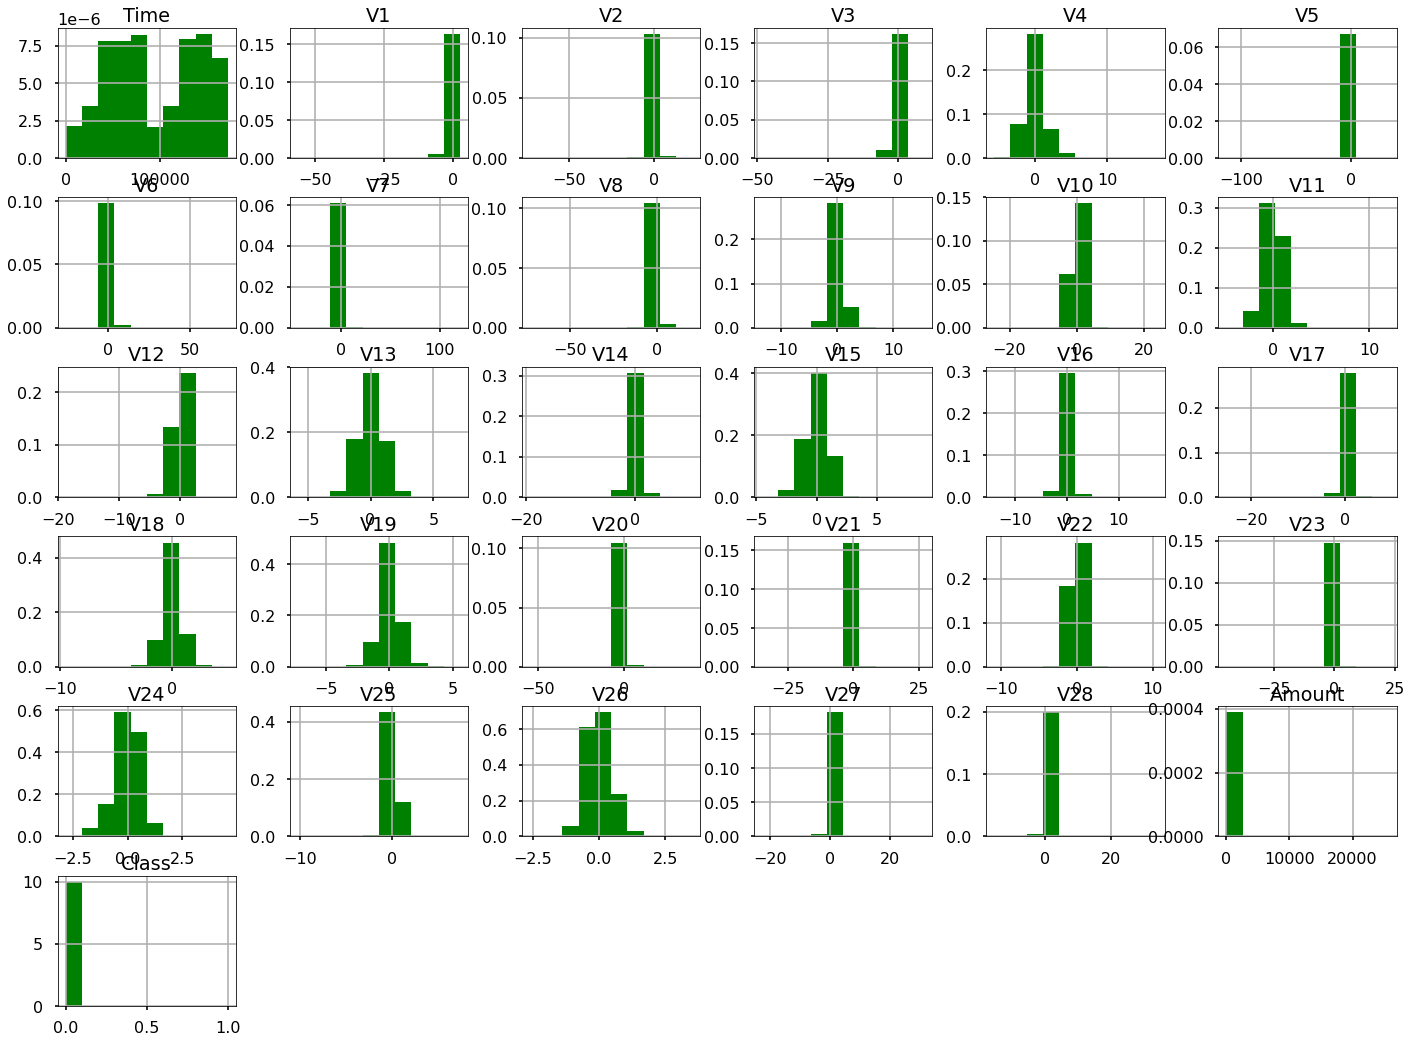

In [8]:
plt.style.use("seaborn-poster")
df.hist(figsize=(24,18),density=True,color="green")
plt.show()

In [9]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 541 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    492 non-null    float64
 1   V1      492 non-null    float64
 2   V2      492 non-null    float64
 3   V3      492 non-null    float64
 4   V4      492 non-null    float64
 5   V5      492 non-null    float64
 6   V6      492 non-null    float64
 7   V7      492 non-null    float64
 8   V8      492 non-null    float64
 9   V9      492 non-null    float64
 10  V10     492 non-null    float64
 11  V11     492 non-null    float64
 12  V12     492 non-null    float64
 13  V13     492 non-null    float64
 14  V14     492 non-null    float64
 15  V15     492 non-null    float64
 16  V16     492 non-null    float64
 17  V17     492 non-null    float64
 18  V18     492 non-null    float64
 19  V19     492 non-null    float64
 20  V20     492 non-null    float64
 21  V21     492 non-null    float64
 2

In [10]:
df_non_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284315 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284315 non-null  float64
 1   V1      284315 non-null  float64
 2   V2      284315 non-null  float64
 3   V3      284315 non-null  float64
 4   V4      284315 non-null  float64
 5   V5      284315 non-null  float64
 6   V6      284315 non-null  float64
 7   V7      284315 non-null  float64
 8   V8      284315 non-null  float64
 9   V9      284315 non-null  float64
 10  V10     284315 non-null  float64
 11  V11     284315 non-null  float64
 12  V12     284315 non-null  float64
 13  V13     284315 non-null  float64
 14  V14     284315 non-null  float64
 15  V15     284315 non-null  float64
 16  V16     284315 non-null  float64
 17  V17     284315 non-null  float64
 18  V18     284315 non-null  float64
 19  V19     284315 non-null  float64
 20  V20     284315 non-null  float64
 21  V21     28

In [11]:
#Data Balancing
df_non_fraud=df_non_fraud.sample(n=492)
df_non_fraud.head()
df_non_fraud.shape
df_non_fraud.info()

# New Balanced data set with frand and genuine txns 
dfb=df_non_fraud.append(df_fraud)
dfb.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 280785 to 279791
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    492 non-null    float64
 1   V1      492 non-null    float64
 2   V2      492 non-null    float64
 3   V3      492 non-null    float64
 4   V4      492 non-null    float64
 5   V5      492 non-null    float64
 6   V6      492 non-null    float64
 7   V7      492 non-null    float64
 8   V8      492 non-null    float64
 9   V9      492 non-null    float64
 10  V10     492 non-null    float64
 11  V11     492 non-null    float64
 12  V12     492 non-null    float64
 13  V13     492 non-null    float64
 14  V14     492 non-null    float64
 15  V15     492 non-null    float64
 16  V16     492 non-null    float64
 17  V17     492 non-null    float64
 18  V18     492 non-null    float64
 19  V19     492 non-null    float64
 20  V20     492 non-null    float64
 21  V21     492 non-null    float64

(984, 31)

# ***Models with outliers replaced with Mode and balanced dataset***

In [12]:

def median_outlier(df_in, col_name):
    median=df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    df_out.loc[df_in[col_name] < fence_low] = np.nan
    df_out.loc[df_in[col_name] > fence_high] = np.nan
    df_out.fillna(median,inplace=True)
    return df_out

    for i in range(1,29):
      dfb = median_outlier(dfb,"V"+str(i))


In [13]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 280785 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64

In [14]:
X = dfb.iloc[:, :-1]
y = dfb.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [15]:
X_train.shape

(787, 30)

In [16]:
y_train.shape

(787,)

In [17]:
y_test

109951    0
8842      1
281520    0
44223     1
241254    1
         ..
183272    0
263324    1
189463    0
55401     1
203700    1
Name: Class, Length: 197, dtype: int64

# ***Logistic Regression***

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)   

LogisticRegression()

In [19]:
print(classifier.intercept_, classifier.coef_)

[0.0077346] [[-2.21324414e-05 -3.77449454e-01  3.14739636e-01 -5.76809545e-01
   3.70134117e-01 -2.52216926e-01 -1.13774912e-01 -4.64689582e-01
   4.56084639e-02 -2.19196936e-01 -4.58999381e-01  3.02929368e-01
  -5.08196432e-01 -1.41558247e-02 -5.61962326e-01 -9.10063763e-03
  -3.35120331e-01 -5.39330892e-01 -1.81653751e-01  5.35671764e-02
   3.63626623e-02  4.76015670e-02  6.85138674e-03  3.06670548e-04
  -1.07436110e-02  4.36033468e-04  3.57480457e-03  1.35602513e-02
   3.50581649e-03  1.13838072e-03]]


In [20]:
pred = classifier.predict(X_train)

In [21]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 0.9148665819567979


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
pred_b = classifier.predict(X_test)

In [24]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93        91
           1       0.99      0.89      0.94       106

    accuracy                           0.93       197
   macro avg       0.94      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197



In [25]:
import sklearn.metrics as metrics
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)


In [26]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

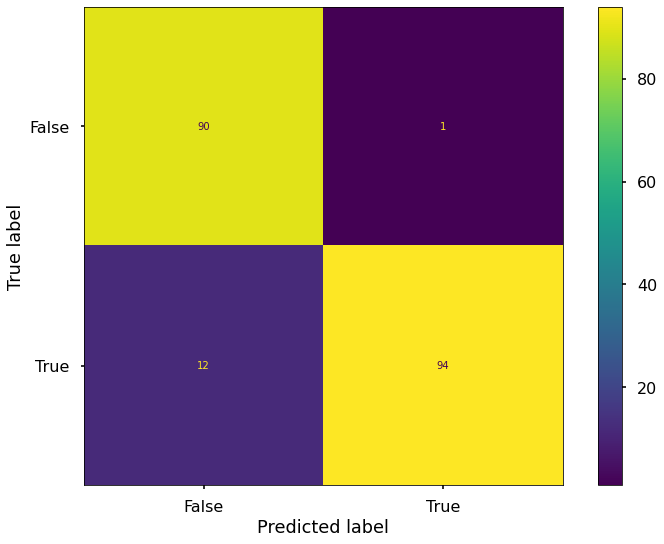

In [27]:
cm_display.plot()
plt.show()

# ***K - Nearest Neighbour***

In [28]:
classifier=KNeighborsClassifier()

In [29]:
classifier.fit(X_train, y_train)   

KNeighborsClassifier()

In [30]:
pred = classifier.predict(X_train)

In [31]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))


Accuracy from sk-learn: 0.7687420584498094


In [32]:
pred_b = classifier.predict(X_test)

In [33]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.71      0.67        91
           1       0.72      0.63      0.67       106

    accuracy                           0.67       197
   macro avg       0.67      0.67      0.67       197
weighted avg       0.68      0.67      0.67       197



In [34]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)

In [35]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

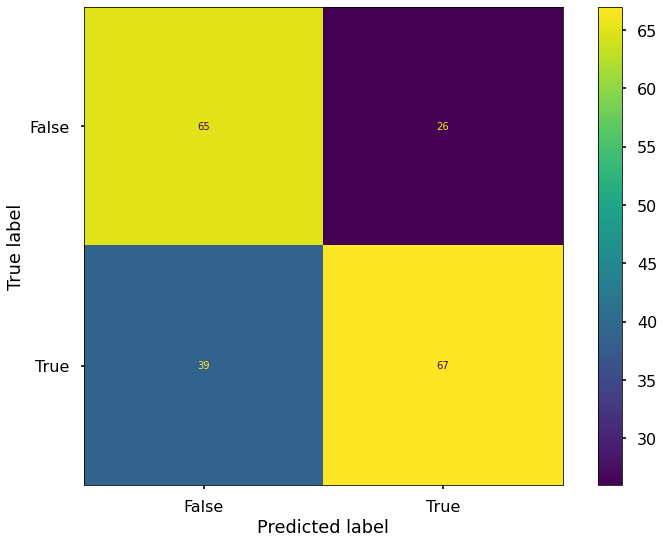

In [36]:
cm_display.plot()
plt.show()

# ***Support Vector Machine***

In [37]:
classifier=SVC()

In [38]:
classifier.fit(X_train, y_train)   

SVC()

In [39]:
pred = classifier.predict(X_train)

In [40]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 0.5273189326556544


In [41]:
pred_b = classifier.predict(X_test)

In [42]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       0.53      0.57      0.55        91
           1       0.61      0.57      0.59       106

    accuracy                           0.57       197
   macro avg       0.57      0.57      0.57       197
weighted avg       0.57      0.57      0.57       197



In [43]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)

In [44]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

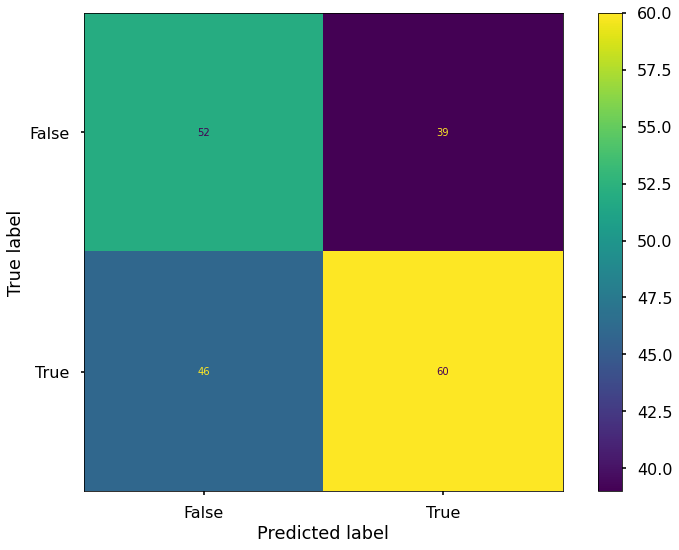

In [45]:
cm_display.plot()
plt.show()

# **Decision Tree Classifier**

In [46]:
classifier=DecisionTreeClassifier()

In [47]:
classifier.fit(X_train, y_train) 

DecisionTreeClassifier()

In [48]:
pred = classifier.predict(X_train)

In [49]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 1.0


In [50]:
# print('Accuracy from DecisionTreeClassifier for training : 0.89')

In [51]:
pred_b = classifier.predict(X_test)

In [52]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        91
           1       0.94      0.86      0.90       106

    accuracy                           0.89       197
   macro avg       0.89      0.90      0.89       197
weighted avg       0.90      0.89      0.89       197



In [53]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

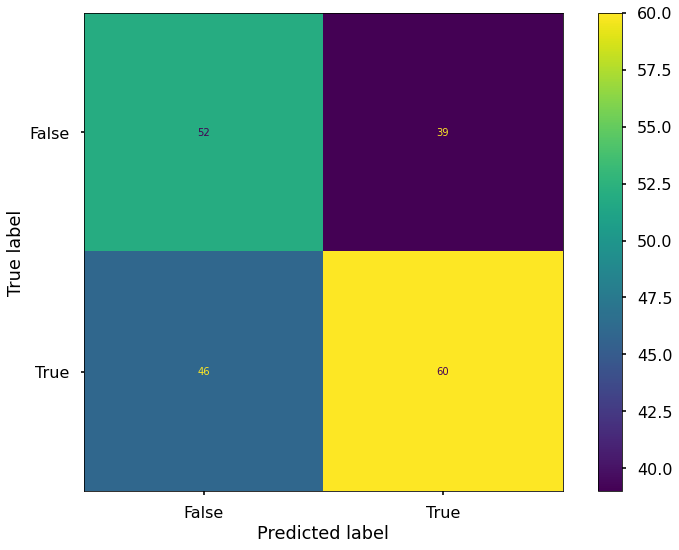

In [54]:
cm_display.plot()
plt.show()